# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

from newsapi.newsapi_client import NewsApiClient

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Samadi\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
# Read your api key environment variable
load_dotenv()
api_key = os.getenv("NEWSAPI")

In [3]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)

In [4]:
# Fetch the Bitcoin news articles
bitcoin_news_en = newsapi.get_everything(
    q="bitcoin",
    language="en"
)

# Show the total number of news
bitcoin_news_en["totalResults"]

7798

In [5]:
# Fetch the Ethereum news articles
ethereum_news_en = newsapi.get_everything(
    q="ethereum",
    language="en"
)

# Show the total number of news
ethereum_news_en["totalResults"]

4937

In [6]:
# function for create Dataframe from NewsAPI result.
def create_df(news):
    articles = []

    for article in news:
        try:
            title = article["title"]
            description = article["description"]
            text = article["content"]
            date = article["publishedAt"][:10]
            articles.append({
                "title": title,
                "description": description,
                "text": text,
                "date": date,
            })
        except AttributeError:
            pass

    return pd.DataFrame(articles)

In [7]:
# function for make Dataframe with sentiment analysis for title and text of news
def sentiment_score(news_df):
    # Sentiment scores dictionaries
    title_sent = {
     "title_compound": [],
     "title_pos": [],
     "title_neu": [],
     "title_neg": []
    }
    text_sent = {
     "text_compound": [],
     "text_pos": [],
     "text_neu": [],
     "text_neg": []
    }

    # Get sentiment for the text and the title
    for index, row in news_df.iterrows():
        try:
            # Sentiment scoring with VADER
            title_sentiment = analyzer.polarity_scores(row["title"])
            title_sent["title_compound"].append(title_sentiment["compound"])
            title_sent["title_pos"].append(title_sentiment["pos"])
            title_sent["title_neu"].append(title_sentiment["neu"])
            title_sent["title_neg"].append(title_sentiment["neg"])

            text_sentiment = analyzer.polarity_scores(row["text"])
            text_sent["text_compound"].append(text_sentiment["compound"])
            text_sent["text_pos"].append(text_sentiment["pos"])
            text_sent["text_neu"].append(text_sentiment["neu"])
            text_sent["text_neg"].append(text_sentiment["neg"])
        except AttributeError:
            pass
    
    # Attaching sentiment columns to the News DataFrame
    title_sentiment_df = pd.DataFrame(title_sent)
    text_sentiment_df = pd.DataFrame(text_sent)
    senti_news_df = news_df.join(title_sentiment_df).join(text_sentiment_df)
    return pd.DataFrame(senti_news_df) 
    

In [8]:
# Create the Bitcoin sentiment scores DataFrame
bitcoin_df = create_df(bitcoin_news_en["articles"])
sent_bitcoin_df=sentiment_score(bitcoin_df)
sent_bitcoin_df.head()

,title,description,text,date,title_compound,title_pos,title_neu,title_neg,text_compound,text_pos,text_neu,text_neg
0,The Rise and Fall of a Bitcoin Mining Sensation,Compass Mining grew quickly during crypto’s ha...,It was 8:45 in the morning of June 13 when Bil...,2022-08-03,0.0000,0.000,1.000,0.000,0.5574,0.119,0.881,0.000
1,Bitcoin Fog Case Could Put Cryptocurrency Trac...,"Roman Sterlingov, accused of laundering $336 m...","Tools to trace cryptocurrencies have, over jus...",2022-08-02,0.0000,0.000,1.000,0.000,0.0000,0.000,1.000,0.000
2,Bitcoin Dumpster Guy Has a Wild Plan to Rescue...,You gotta hand it to some people for being imp...,You gotta hand it to some people for being imp...,2022-07-25,0.4019,0.208,0.692,0.101,0.5994,0.130,0.835,0.034
3,Ethereum's 'Merge' Is a Big Deal for Crypto—an...,One of the most influential cryptocurrency pro...,Cryptocurrencies are often criticized for bein...,2022-08-18,0.0000,0.000,1.000,0.000,-0.5584,0.068,0.763,0.170
4,"Tesla Sells 75% of its Bitcoin Holdings, Elon ...",<ol><li>Tesla Sells 75% of its Bitcoin Holding...,Elon Musk-owned electric vehicle making compan...,2022-07-21,-0.2960,0.000,0.872,0.128,0.2023,0.053,0.947,0.000


In [9]:
# Create the Ethereum sentiment scores DataFrame
ethereum_df = create_df(ethereum_news_en["articles"])
sent_ethereum_df=sentiment_score(ethereum_df)
sent_ethereum_df.head()

,title,description,text,date,title_compound,title_pos,title_neu,title_neg,text_compound,text_pos,text_neu,text_neg
0,Ethereum's 'Merge' Is a Big Deal for Crypto—an...,One of the most influential cryptocurrency pro...,Cryptocurrencies are often criticized for bein...,2022-08-18,0.0000,0.000,1.000,0.000,-0.5584,0.068,0.763,0.170
1,Instagram is expanding NFT features to more th...,The non-fungible token\r\n (NFT) market has fa...,The non-fungible token\r\n (NFT) market has fa...,2022-08-04,0.0000,0.000,1.000,0.000,-0.0217,0.048,0.901,0.051
2,SEC charges 11 people over 'textbook' $300 mil...,"It's a day of the week ending in the letter ""y...","It's a day of the week ending in the letter ""y...",2022-08-02,-0.2732,0.000,0.826,0.174,-0.2732,0.059,0.827,0.115
3,GameStop is letting someone sell an NFT that r...,"Less than two weeks into its soft launch, Game...","Less than two weeks into its soft launch, Game...",2022-07-23,0.0000,0.000,1.000,0.000,-0.1531,0.000,0.955,0.045
4,Ethereum Merge Explained: Why It Matters For E...,Ethereum will soon adopt a proof-of-stake syst...,"The Ethereum Merge is significant, and not jus...",2022-07-25,0.0258,0.121,0.879,0.000,0.2023,0.048,0.952,0.000


In [10]:
# Describe the Bitcoin Sentiment
sent_bitcoin_df.describe()

,title_compound,title_pos,title_neu,title_neg,text_compound,text_pos,text_neu,text_neg
count,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000
mean,-0.068203,0.06818,0.828270,0.103570,0.047574,0.065810,0.88110,0.053070
std,0.378599,0.09688,0.150602,0.138254,0.455208,0.071569,0.09011,0.072859
min,-0.897900,0.00000,0.388000,0.000000,-0.908100,0.000000,0.62800,0.000000
25%,-0.366350,0.00000,0.730250,0.000000,-0.301550,0.000000,0.82525,0.000000
50%,0.000000,0.00000,0.826000,0.000000,0.000000,0.056000,0.88500,0.000000
75%,0.064375,0.13875,1.000000,0.206500,0.362050,0.110500,0.94900,0.102250
max,0.784500,0.39700,1.000000,0.500000,0.924600,0.372000,1.00000,0.307000


In [21]:
print ("BTC Mean Posetive Score :",(sent_bitcoin_df.title_pos.mean()+sent_bitcoin_df.text_pos.mean())/2)
print ("BTC Max Compound Score  :",(sent_bitcoin_df.title_compound.max()+sent_bitcoin_df.text_compound.max())/2)
print ("BTC Max Posetive Score  :",(sent_bitcoin_df.title_pos.max()+sent_bitcoin_df.text_pos.max())/2)

BTC Mean Posetive Score : 0.066995
BTC Max Compound Score  : 0.8545499999999999
BTC Max Posetive Score  : 0.3845


In [11]:
# Describe the Ethereum Sentiment
sent_ethereum_df.describe()

,title_compound,title_pos,title_neu,title_neg,text_compound,text_pos,text_neu,text_neg
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,-0.014112,0.066290,0.860370,0.073350,0.137046,0.073060,0.884380,0.042580
std,0.331228,0.110981,0.153654,0.123991,0.451054,0.071557,0.086195,0.067228
min,-0.801600,0.000000,0.522000,0.000000,-0.936600,0.000000,0.646000,0.000000
25%,-0.183700,0.000000,0.757500,0.000000,-0.038650,0.000000,0.823500,0.000000
50%,0.000000,0.000000,0.883000,0.000000,0.140550,0.061000,0.893500,0.000000
75%,0.070525,0.118750,1.000000,0.150500,0.510600,0.118250,0.943750,0.057000
max,0.743000,0.406000,1.000000,0.462000,0.921600,0.299000,1.000000,0.354000


In [23]:
print ("ETH Mean Posetive Score :",(sent_ethereum_df.title_pos.mean()+sent_ethereum_df.text_pos.mean())/2)
print ("ETH Max Compound Score  :",(sent_ethereum_df.title_compound.max()+sent_ethereum_df.text_compound.max())/2)
print ("ETH Max Posetive Score  :",(sent_ethereum_df.title_pos.max()+sent_ethereum_df.text_pos.max())/2)


ETH Mean Posetive Score : 0.06967500000000001
ETH Max Compound Score  : 0.8323
ETH Max Posetive Score  : 0.35250000000000004


### Questions:

Q: Which coin had the highest mean positive score?

A:  So Ethereum has higher mean posetive score.

Q: Which coin had the highest compound score?
    
A:  So Bitcoin has higher compund score.

Q. Which coin had the highest positive score?

A:  So Bitcoin has higher posetive score.

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [24]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [25]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
sw = set(stopwords.words('english'))

# Expand the default stopwords list if necessary
sw_list = {'said', 'sent', 'found', 'including', 'today', 'announced', 'week', 'basically', 'also'}

In [26]:
# Complete the tokenizer function
def tokenizer(text, sw, sw_addons):

    # Remove the punctuation from text
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', text)
   
    # Create a tokenized list of the words
    words = word_tokenize(re_clean)
    
    # Lemmatize words into root words
    lem = [lemmatizer.lemmatize(word, pos='v' and 'a') for word in words]
   
    # Convert the words to lowercase
    lcase = [word.lower() for word in lem]
    
    # Remove the stop words
    tokens = [word for word in lcase if word not in sw.union(sw_addons)]
    
    return tokens

In [27]:
# create tokens column fucntion 
def token_col (news_df, stopword, swlist):
# define token dictionary
    tokens = {
     "title_token": [],
     "text_token": [],
     "all_token":[]
    }
    # Get tokens for the text and the title
    for index, row in news_df.iterrows():
        try:
            # Sentiment scoring with VADER
            tokens ["title_token"].append(tokenizer(row["title"],stopword, swlist))
            tokens["text_token"].append(tokenizer(row["text"],stopword, swlist))
            tokens["all_token"].append(list(set(tokenizer(row["title"],stopword, swlist)+ tokenizer(row["text"],stopword, swlist))))
        except AttributeError:
            pass
    
    # Attaching sentiment columns to the News DataFrame
    tokens_df = pd.DataFrame(tokens)
    news_token_df = news_df.join(tokens_df)
    return pd.DataFrame(news_token_df) 

In [28]:
# Create a new tokens column for Bitcoin
token_bitcoin_df= token_col(sent_bitcoin_df, sw, sw_list)
token_bitcoin_df.head()

,title,description,text,date,title_compound,title_pos,title_neu,title_neg,text_compound,text_pos,text_neu,text_neg,title_token,text_token,all_token
0,The Rise and Fall of a Bitcoin Mining Sensation,Compass Mining grew quickly during crypto’s ha...,It was 8:45 in the morning of June 13 when Bil...,2022-08-03,0.0000,0.000,1.000,0.000,0.5574,0.119,0.881,0.000,"[rise, fall, bitcoin, mining, sensation]","[morning, june, bill, stewart, ceo, mainebased...","[stewart, hes, employees, bitcoin, fall, bill,..."
1,Bitcoin Fog Case Could Put Cryptocurrency Trac...,"Roman Sterlingov, accused of laundering $336 m...","Tools to trace cryptocurrencies have, over jus...",2022-08-02,0.0000,0.000,1.000,0.000,0.0000,0.000,1.000,0.000,"[bitcoin, fog, case, could, put, cryptocurrenc...","[tools, trace, cryptocurrencies, last, several...","[enforcement, tracing, bitcoin, years, law, ag..."
2,Bitcoin Dumpster Guy Has a Wild Plan to Rescue...,You gotta hand it to some people for being imp...,You gotta hand it to some people for being imp...,2022-07-25,0.4019,0.208,0.692,0.101,0.5994,0.130,0.835,0.034,"[bitcoin, dumpster, guy, wild, plan, rescue, m...","[got, ta, hand, people, impetuous, even, face,...","[people, uk, even, bitcoin, trash, imagine, re..."
3,Ethereum's 'Merge' Is a Big Deal for Crypto—an...,One of the most influential cryptocurrency pro...,Cryptocurrencies are often criticized for bein...,2022-08-18,0.0000,0.000,1.000,0.000,-0.5584,0.068,0.763,0.170,"[ethereums, merge, big, deal, cryptoand, planet]","[cryptocurrencies, often, criticized, bad, pla...","[bad, cambridges, planet, electricity, bitcoin..."
4,"Tesla Sells 75% of its Bitcoin Holdings, Elon ...",<ol><li>Tesla Sells 75% of its Bitcoin Holding...,Elon Musk-owned electric vehicle making compan...,2022-07-21,-0.2960,0.000,0.872,0.128,0.2023,0.053,0.947,0.000,"[tesla, sells, bitcoin, holdings, elon, musk, ...","[elon, muskowned, electric, vehicle, making, c...","[company, muskowned, vehicle, electric, signif..."


In [29]:
# Create a new tokens column for Ethereum
token_ethereum_df= token_col(sent_ethereum_df, sw, sw_list)
token_ethereum_df.head()

,title,description,text,date,title_compound,title_pos,title_neu,title_neg,text_compound,text_pos,text_neu,text_neg,title_token,text_token,all_token
0,Ethereum's 'Merge' Is a Big Deal for Crypto—an...,One of the most influential cryptocurrency pro...,Cryptocurrencies are often criticized for bein...,2022-08-18,0.0000,0.000,1.000,0.000,-0.5584,0.068,0.763,0.170,"[ethereums, merge, big, deal, cryptoand, planet]","[cryptocurrencies, often, criticized, bad, pla...","[bad, cambridges, planet, electricity, bitcoin..."
1,Instagram is expanding NFT features to more th...,The non-fungible token\r\n (NFT) market has fa...,The non-fungible token\r\n (NFT) market has fa...,2022-08-04,0.0000,0.000,1.000,0.000,-0.0217,0.048,0.901,0.051,"[instagram, expanding, nft, features, countries]","[nonfungible, token, nft, market, fallen, clif...","[cliff, stopping, doubling, expanding, nf, may..."
2,SEC charges 11 people over 'textbook' $300 mil...,"It's a day of the week ending in the letter ""y...","It's a day of the week ending in the letter ""y...",2022-08-02,-0.2732,0.000,0.826,0.174,-0.2732,0.059,0.827,0.115,"[sec, charges, people, textbook, million, cryp...","[day, ending, letter, inevitably, means, there...","[ending, peopl, inevitably, securities, people..."
3,GameStop is letting someone sell an NFT that r...,"Less than two weeks into its soft launch, Game...","Less than two weeks into its soft launch, Game...",2022-07-23,0.0000,0.000,1.000,0.000,-0.1531,0.000,0.955,0.045,"[gamestop, letting, someone, sell, nft, refere...","[less, two, weeks, soft, launch, gamestops, nf...","[sell, called, artwork, listed, letting, two, ..."
4,Ethereum Merge Explained: Why It Matters For E...,Ethereum will soon adopt a proof-of-stake syst...,"The Ethereum Merge is significant, and not jus...",2022-07-25,0.0258,0.121,0.879,0.000,0.2023,0.048,0.952,0.000,"[ethereum, merge, explained, matters, everyone...","[ethereum, merge, significant, people, crypto,...","[people, significant, reduce, another, chars, ..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [30]:
from collections import Counter
from nltk import ngrams
from wordcloud import WordCloud
import matplotlib.pyplot as plt 

In [31]:
 #N-grams calculation function N=2
def process_text(doc):
    sw = set(stopwords.words('english'))
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', doc)
    words = word_tokenize(re_clean)
    lem = [lemmatizer.lemmatize(word, pos='v' and 'a') for word in words]
    sw_words = [word.lower() for word in lem if word.lower() not in sw]
    bigrams = ngrams(sw_words, 2)
    output = ['_'.join(i) for i in bigrams]
    return ' '.join(output)

In [32]:
# Generate the Bitcoin N-grams where N=2
btc_articles = bitcoin_news_en["articles"] 
btc_bigstr=""
for  arr in btc_articles: 
     btc_bigstr= btc_bigstr + arr["title"] +arr["content"]
        
ngram_btc_words = process_text(btc_bigstr)

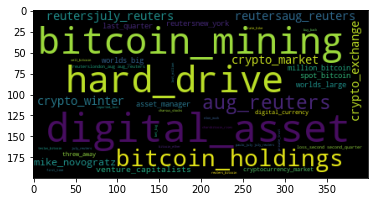

In [33]:
 # Generate Bitcoin wordcloud
wc = WordCloud().generate(ngram_btc_words)
plt.imshow(wc)

In [34]:
# Generate the Ethereum N-grams where N=2
eth_articles = ethereum_news_en["articles"] 
eth_bigstr=""
for  arr in eth_articles: 
     eth_bigstr= eth_bigstr + arr["title"] +arr["description"]
        
ngram_eth_words = process_text(eth_bigstr)

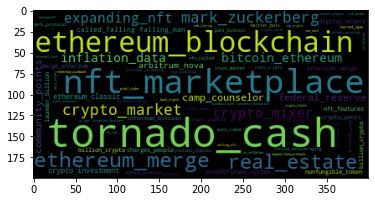

In [35]:
 # Generate Ethereum wordcloud
wc = WordCloud().generate(ngram_eth_words)
plt.imshow(wc)

In [36]:
 # Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [37]:
# Use token_count to get the top 10 words for Bitcoin
btc_count=token_count(tokenizer(btc_bigstr, sw,sw_list), 10)
btc_count

[('bitcoin', 84),
 ('crypto', 50),
 ('reuters', 29),
 ('cryptocurrency', 25),
 ('digital', 21),
 ('year', 19),
 ('million', 17),
 ('big', 15),
 ('market', 13),
 ('investors', 12)]

In [38]:
# Use token_count to get the top 10 words for Ethereum
eth_count=token_count(tokenizer(eth_bigstr, sw,sw_list), 10)
eth_count

[('crypto', 43),
 ('ethereum', 35),
 ('nft', 20),
 ('merge', 16),
 ('bitcoin', 15),
 ('stocks', 14),
 ('blockchain', 12),
 ('market', 11),
 ('us', 11),
 ('inflation', 11)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [40]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

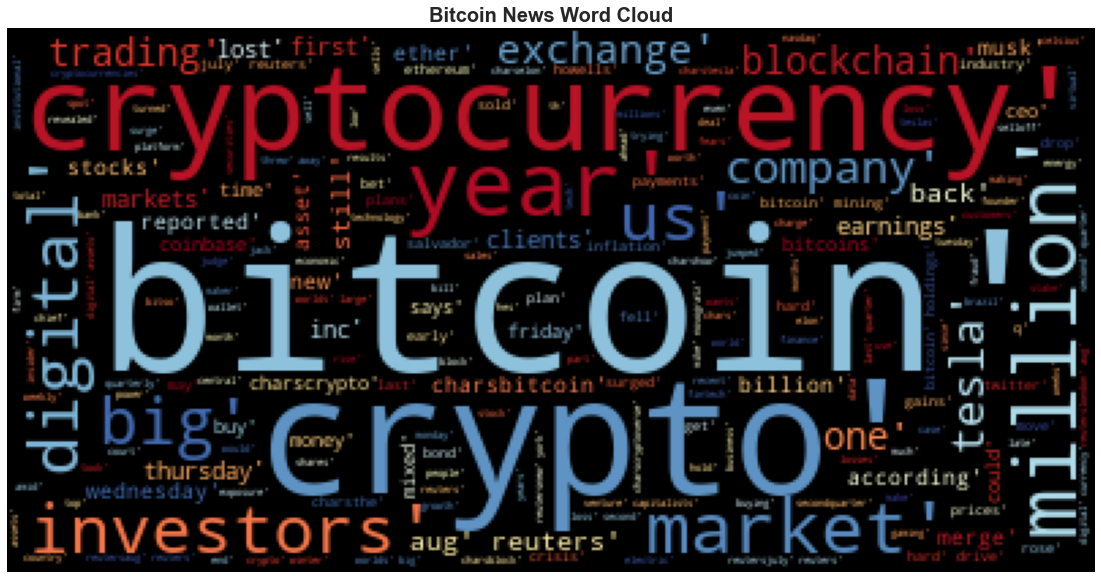

In [41]:
# Generate the Bitcoin word cloud
btc_list = str(tokenizer(btc_bigstr, sw,sw_list))

# Create the word cloud
wordcloud = WordCloud(colormap="RdYlBu").generate(btc_list)
plt.imshow(wordcloud)
plt.axis("off")
fontdict = {"fontsize": 20, "fontweight": "bold"}
plt.title("Bitcoin News Word Cloud", fontdict=fontdict)
plt.show()

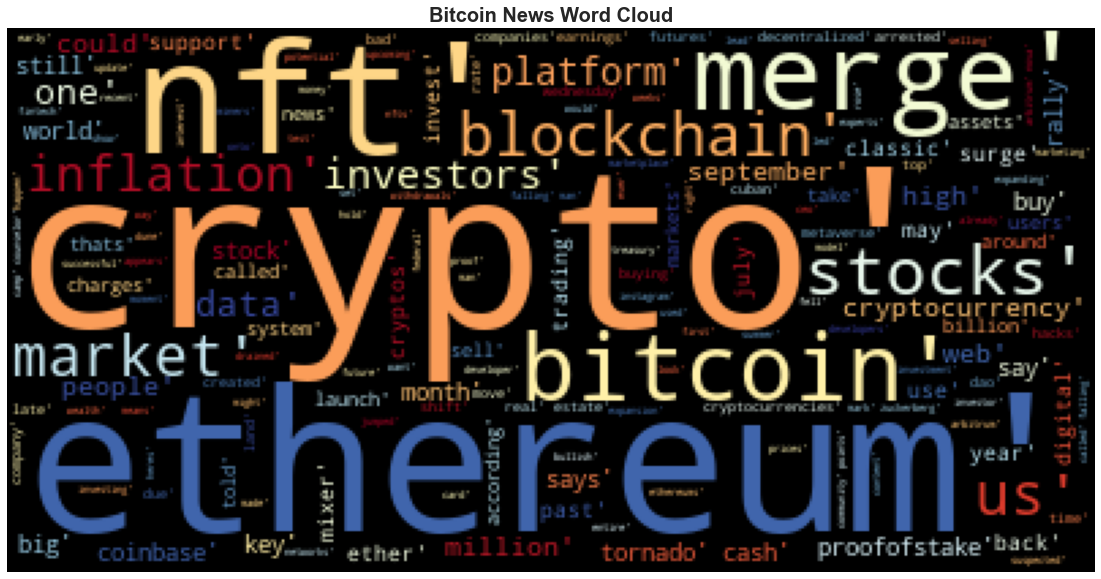

In [42]:
# Generate the Ethereum word cloud
eth_list = str(tokenizer(eth_bigstr, sw,sw_list))

# Create the word cloud
wordcloud = WordCloud(colormap="RdYlBu").generate(eth_list)
plt.imshow(wordcloud)
plt.axis("off")
fontdict = {"fontsize": 20, "fontweight": "bold"}
plt.title("Bitcoin News Word Cloud", fontdict=fontdict)
plt.show()

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [43]:
import spacy
from spacy import displacy

In [44]:
# Download the language model for SpaCy
#!python -m spacy download en_core_web_sm

In [45]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [46]:
# Set article to be analyzed with spaCy
#btc_nlp = nlp(btc_bigstr)

# Render NER visualization with displacy to determine entities for extraction
#displacy.render(btc_nlp, style='ent')


In [47]:
# Concatenate all of the Bitcoin text together
btc_articles = bitcoin_news_en["articles"] 
btc_text=""
for  arr in btc_articles: 
     btc_text= btc_text +arr["content"]

In [48]:
# Run the NER processor on all of the text
btc_nlp = nlp(btc_text)

# Add a title to the document
btc_nlp.user_data["title"] = "Bitcoin NER"

In [49]:
# Render the visualization
displacy.render(btc_nlp, style='ent')

In [52]:
# List all Entities
btc_entities = [ent.text for ent in btc_nlp.ents  if ent.label_ in ['GPE', 'ORG']]
btc_entities

['Maine',
 'Dynamics Mining',
 'UK',
 'Belgium',
 'the University of Cambridges Bitcoin Electricity Consump',
 'Tesla',
 'Reuters',
 'Tesla',
 'US',
 'Reuters',
 'Reuters',
 'GMT',
 'Reuters',
 'Elon Musks',
 'Reuters',
 'BlackRock Inc',
 'the United States',
 'Reuters',
 'YORK',
 'Reuters',
 'Tesla Inc',
 'Reuters',
 'Santa Lucia',
 "CNN Business'",
 'Bell',
 'The U.S. Department of Justice',
 "Celsius Networks'",
 '+1912',
 'the Tysons Corner',
 'Virginia',
 'MicroStrategy',
 'Reuters',
 'Zipmex',
 'Reuters',
 'YORK',
 'Reuters',
 'Texas',
 'Reuters',
 'Valereum',
 'Vinanz Ltd',
 'GPV',
 'YoY',
 'Salvador',
 'Mexico',
 'bitco',
 'BlackRock',
 'Reuters',
 'Block Inc',
 'Reuters',
 'Block Inc',
 'El Salvador',
 'Reuters',
 'the U.S.',
 'Senate',
 'the Commodity Futures Trading Commission',
 'CFTC',
 'U.S.',
 'U.S.',
 'the Securities and Exchange Commission',
 'UK',
 'Newport',
 'Wales',
 'GamesBeat Summit Next',
 'Reuters',
 'CryptoCompare',
 'Reuters',
 'Reuters',
 "Scaramucci's SkyBr

---

### Ethereum NER

In [53]:
# Concatenate all of the Ethereum text together
eth_articles = ethereum_news_en["articles"] 
eth_text=""
for  arr in eth_articles: 
     eth_text= eth_text +arr["content"]

In [54]:
# Run the NER processor on all of the text
eth_nlp = nlp(eth_text)

# Add a title to the document
eth_nlp.user_data["title"] = "Ethereum NER"

In [55]:
# Render the visualization
displacy.render(eth_nlp, style='ent')

In [56]:
# List all Entities
eth_entities = [ent.text for ent in eth_nlp.ents  if ent.label_ in ['GPE', 'ORG']]
eth_entities

['Belgium',
 'the University of Cambridges Bitcoin Electricity Consump',
 'NFT',
 'Instagram',
 'NF',
 'The Securities and Exchange Commission',
 'GameStops',
 'NFT',
 'Ethereum',
 'the Ethereum Community Conference',
 'Paris',
 'Reuters',
 'Zipmex',
 "US Treasury Department's",
 'Office of Foreign Asset Control',
 'Ameri',
 'JPMorgan',
 'New York',
 'Reuters',
 'GMT',
 'Reuters',
 'Reuters',
 'CryptoCompare',
 'NIRV',
 'U.S.',
 'CoinGecko',
 '+1513',
 'Curry',
 'Curry',
 "Scaramucci's SkyBridge Capital",
 'The Legion Strategies',
 'Nomad',
 'YORK',
 'Reuters',
 'Coinbase Global Inc',
 'U.S.',
 'Treasury',
 'US',
 'Ethereum',
 'NFT',
 'Goerli',
 'Sepolia',
 'Goerli',
 'Intels Arc Alchemist',
 'Intel',
 'chars]GameStop',
 'NFT',
 'US',
 'Ethereum',
 'Manhattan',
 'Facebooks',
 'Meta',
 'BlenderBot',
 'Metas',
 'Los Angeles',
 'Securities and Exchange Commission',
 'Bank of America',
 'YouTube',
 'Altcoin Daily',
 'Bath &',
 'Beyond',
 'Vanda Research',
 'NFT',
 'the Bored Ape Yacht Club

---